# PP5 - Mildew Detection in CHerry Leaves

## Notebook 2 - Data Visualization

### Objectives

* Fetch data from kaggle and prepare data for further processes.


### Inputs

* Dataset: [Kaggle](https://www.kaggle.com/datasets/codeinstitute/cherry-leaves/data)

| **input**       |          |        |
|-----------------|----------|--------|
| **train/**      | healthy  | mildew |
| **test/**       | healthy  | mildew |
| **validation/** | healthy  | mildew |


### Outputs
- Data/Image visualization
- outputs/{version}


---

## Preparation

### Manage Directories

**Change working directory**

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/ml-mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [2]:
os.chdir('/workspace/ml-mildew-detection-in-cherry-leaves')
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/ml-mildew-detection-in-cherry-leaves'

**Set Input Directory**

In [4]:
dataset_dir= 'input/cherry-leaves'
train_path = dataset_dir + '/train'
val_path = dataset_dir + '/validation'
test_path = dataset_dir + '/test'
print(f"Train Set Path: {train_path}")
print(f"Validation Set Path: {val_path}")
print(f"Test Set Path: {test_path}")

Train Set Path: input/cherry-leaves/train
Validation Set Path: input/cherry-leaves/validation
Test Set Path: input/cherry-leaves/test


**Set Output Directory**

In [5]:
version = 'v1'

In [6]:
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

print(file_path)

Old version is already available create a new version.
outputs/v1


**Set Label Names**

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'mildew']


---

## Data visualisation of Image Data

**Import Libraries**

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

**Get current Image Shape**

In [9]:
img_height, img_width = [], []

for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        d1, d2, colors = img.shape
        img_height.append(d1)
        img_width.append(d2)


In [10]:
img_height_mean = int(np.array(img_height).mean())
img_width_mean = int(np.array(img_width).mean())

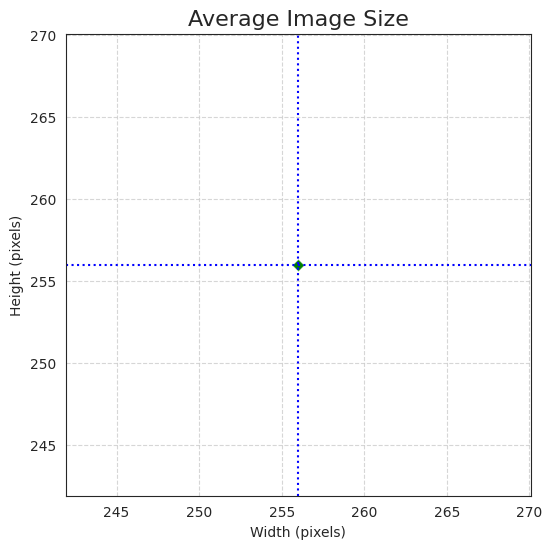

Image Width average: 256 
Image Height average: 256


In [11]:
sns.set_style("white")
fig, axes = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=img_width, y=img_height, alpha=0.3, color='green', marker='D')
axes.set_xlabel("Width (pixels)", fontsize=10)
axes.set_ylabel("Height (pixels)", fontsize=10)
axes.axvline(x=img_height_mean, color='blue', linestyle=':')
axes.axhline(y=img_width_mean, color='blue', linestyle=':')
plt.title("Average Image Size", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

print(f"Image Width average: {img_width_mean} \nImage Height average: {img_height_mean}")

In [12]:
num_color_channels = 3
image_shape = (img_height_mean, img_width_mean, num_color_channels)
image_shape

(256, 256, 3)

**Save image shape for further usage**

In [13]:
joblib.dump(value=image_shape, filename=f"{file_path}/avg_image_shape_train.pkl")

['outputs/v1/avg_image_shape_train.pkl']

---

## Average and Variability of Images per Label

**Load images in an array**

In [17]:
from tensorflow.keras.preprocessing import image

In [36]:
def load_image_as_array(dataset_dir, new_size=(100, 100), n_images_per_label=20):
    '''
    Description:
    Loads images from a directory in an array

    Parameters:
    dataset_dir - str:         Directory path of images
    new_size - tuple:          New size to which images will be resized
    n_images_per_label - int:  Number of images to be loaded per label

    Returns:
    X as numpy array: Array containing the images
    y as numpy array: Array containing the labels of the images
    '''
    X, y = np.array([], dtype='int'), np.array([], dtype='object')
    labels = os.listdir(dataset_dir)

    for label in labels:
        counter = 0
        for image_file in os.listdir(os.path.join(dataset_dir, label)):
            if counter < n_images_per_label:

                img = image.load_img(
                    os.path.join(dataset_dir, label, image_file),
                    target_size=new_size)
                if image.img_to_array(img).max() > 1:
                    resize_img = image.img_to_array(img) / 255
                else:
                    resize_img = image.img_to_array(img)

                X = np.append(
                    X, resize_img).reshape(-1, new_size[0], new_size[1],
                                            resize_img.shape[2])
                y = np.append(y, label)
                counter += 1
                

    return X, y

In [38]:
X, y = load_image_as_array(dataset_dir=train_path,
                           new_size=image_shape,
                           n_images_per_label=30)
print("Final shape of X:", X.shape)
print("Final shale of y:", y.shape)

Final shape of X: (60, 256, 256, 3)
Final shale of y: (60,)


**Plot and save mean vaiability of images per label**

In [58]:
def plot_avg_variability_per_labels(X, y, figsize=(10, 5), save_image=False):
    '''
    Description:
    Plots average and variability of images for no-tumor and tumor (labels)

    Parameters:
    X - numpy array:    Input images
    y - numpy array:    Labels of images
    figsize - tuple:    Size of the figure
    save_image - bool:  Optional to save the image, default is false

    Returns:
    None

    '''

    for label_to_display in np.unique(y):
        sns.set_style("white")

        y = y.reshape(-1, 1, 1)
        boolean_mask = np.any(y == label_to_display, axis=1).reshape(-1)
        arr = X[boolean_mask]

        avg_img = np.mean(arr, axis=0)
        std_img = np.std(arr, axis=0)
        print(f"==== Label {label_to_display} ====")
        print(f"Image Shape: {avg_img.shape}")
        
        max_pixel_value = np.max(avg_img)

        avg_img_norm = avg_img / max_pixel_value
        std_img_norm = std_img / max_pixel_value
        
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
        axes[0].set_title(f'Average image for {label_to_display} label')
        axes[0].imshow(avg_img_norm)
        axes[1].set_title(f'Variability image for {label_to_display} label')
        axes[1].imshow(std_img_norm)

        if save_image:
            plt.savefig(f'{file_path}/avg_var_{label_to_display}.png',
                        bbox_inches='tight', dpi=150)
        else:
            plt.tight_layout()
            plt.show()
            print("\n")

==== Label healthy ====
Image Shape: (256, 256, 3)


==== Label mildew ====
Image Shape: (256, 256, 3)


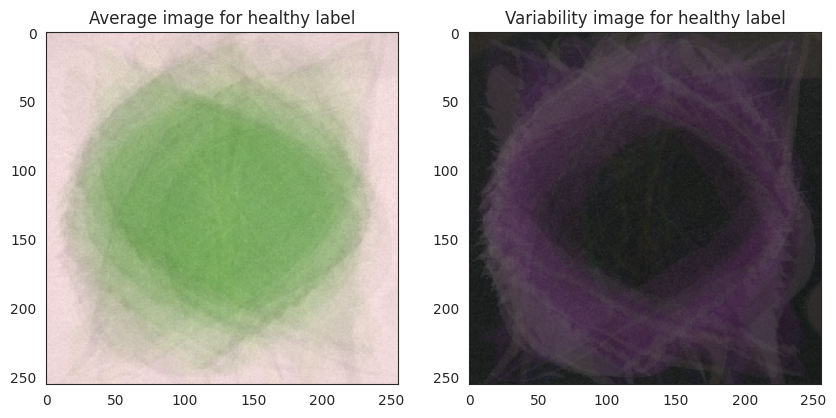

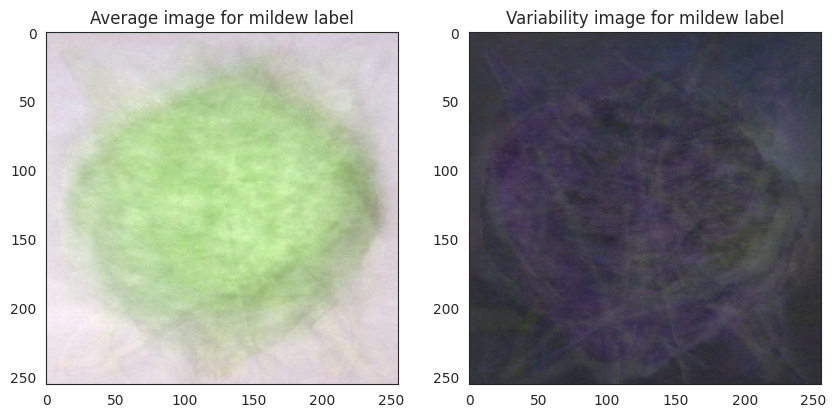

In [59]:
plot_avg_variability_per_labels(X=X, y=y, figsize=(10, 5), save_image=True)